# Exercise Graph 4
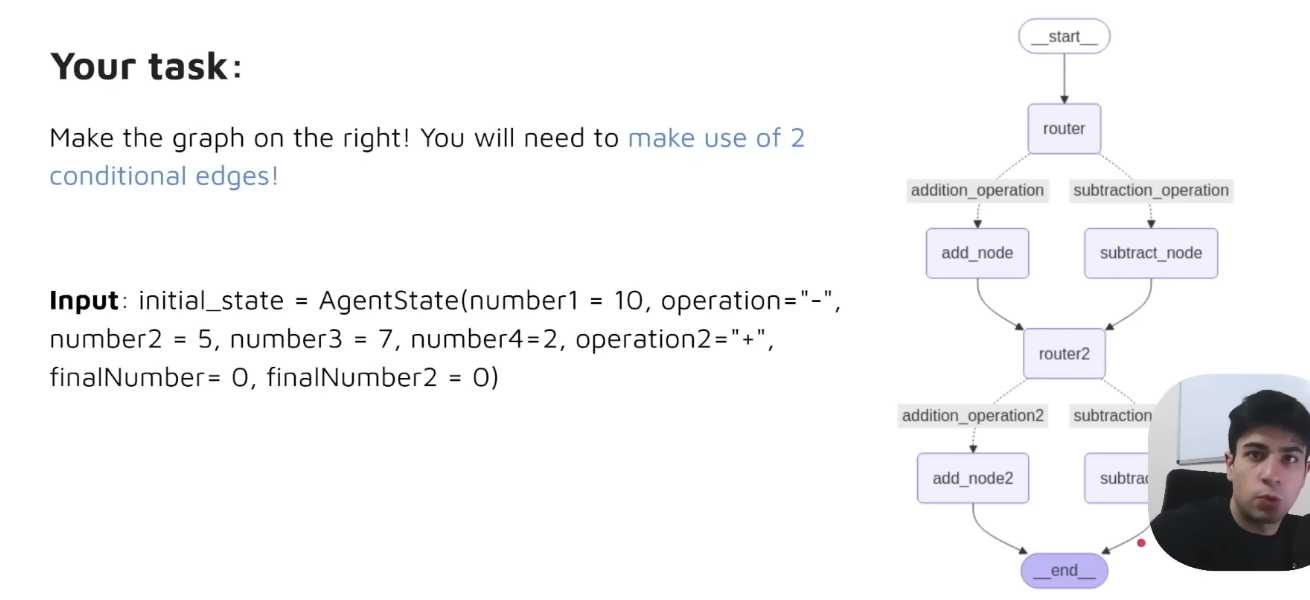

In [1]:
from typing import TypedDict,Optional
from langgraph.graph import StateGraph,START,END
from dataclasses import dataclass


In [2]:
@dataclass
class AgentState:
    number1:int|None
    operation:str|None
    number2:int|None
    number3:int|None
    number4:int|None
    operation2:str|None
    final_number:Optional[int]=None
    final_number2:Optional[int]=None
    

In [3]:
def adder(state: AgentState) -> AgentState:
    """Add number1 and number2, store result in finalNumber"""
    state.final_number = state.number1 + state.number2
    return state

def adder2(state: AgentState) -> AgentState:
    """Add number1 and number2, store result in finalNumber"""
    state.final_number2 = state.number3 + state.number4
    return state

def subtractor(state: AgentState) -> AgentState:
    """Subtract number2 from number1, store result in finalNumber"""
    state.final_number = state.number1 - state.number2
    return state

def subtractor2(state: AgentState) -> AgentState:
    """Subtract number2 from number1, store result in finalNumber"""
    state.final_number2 = state.number1 - state.number2
    return state

def decide_next_node(state: AgentState) -> str:
    """Determine which operation node to route to based on operation type
    
    Args:
        state (AgentState): Current state containing operation type
    
    Returns:
        str: Node name for routing ("addition_operation" or "subtractor_operations")
    """
    if state.operation == "+":
        return "addition_operation"
    elif state.operation == "-":
        return "subtraction_operation"
    
def decide_next_node2(state: AgentState) -> str:
    """Determine which operation node to route to based on operation type
    
    Args:
        state (AgentState): Current state containing operation type
    
    Returns:
        str: Node name for routing ("addition_operation" or "subtractor_operations")
    """
    if state.operation2 == "+":
        return "addition_operation2"
    elif state.operation2 == "-":
        return "subtraction_operation2"

In [4]:
graph=StateGraph(AgentState)
graph.add_node("add_node",adder)
graph.add_node("subtract_node",subtractor)
graph.add_node("router",lambda state:state)

graph.add_edge(START,"router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition_operation":"add_node",
        "subtraction_operation":"subtract_node"
    }
)

graph.add_node("add_node2",adder2)
graph.add_node("subtract_node2",subtractor2)
graph.add_node("router2",lambda state:state)

graph.add_edge("add_node","router2")
graph.add_edge("subtract_node","router2")
graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        "addition_operation2":"add_node2",
        "subtraction_operation2":"subtract_node2"
    }
)

graph.add_edge("add_node2",END)
graph.add_edge("subtract_node2",END)
app=graph.compile()

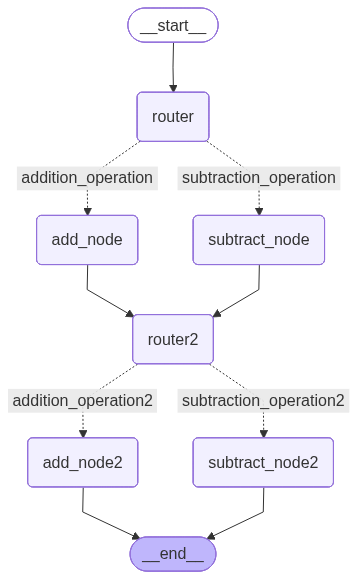

In [5]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
initial_state_1=AgentState(number1=10,operation="-",number2=5,number3=7,operation2="+",number4=2)
print(app.invoke(initial_state_1))

{'number1': 10, 'operation': '-', 'number2': 5, 'number3': 7, 'number4': 2, 'operation2': '+', 'final_number': 5, 'final_number2': 9}
